### exercise b

In [456]:
from numpy import *
from matplotlib.pyplot import *
file_loc = "C:\Users\\vilde\Documents\\variational-monte-carlo-fys4411\Output"

font = {'family' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

import seaborn as sns

sns.set_style('darkgrid')


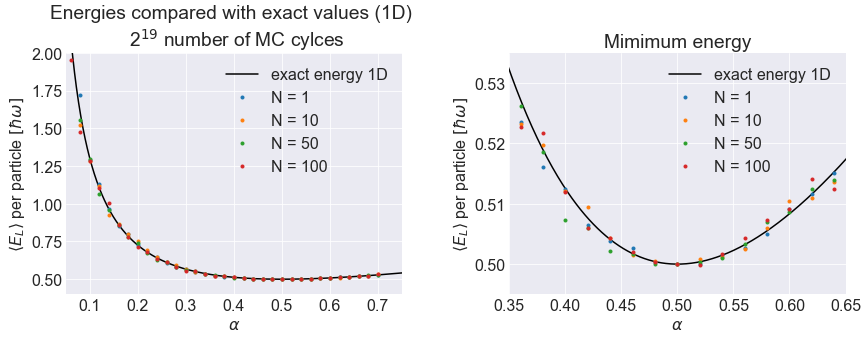

In [202]:
N = ["1", "10", "50", "100"]

alpha = linspace(0.04,0.8, 1000)
energy = 0.5*alpha + 1/(8.0*alpha)

# plot(alpha, energy*2, "-", label="exact energy 2D")
# plot(alpha, energy*3, "-", label="exact energy 3D")

figure(1, figsize=(12,5))

subplot(1,2,1)
plot(alpha, energy, "k-", label="exact energy 1D")

subplot(1,2,2)
plot(alpha, energy, "k-", label="exact energy 1D")

for i in range(len(N)):

    Ni = genfromtxt(file_loc+ "\exercise_b" + "\\analytical_1d_%sp_energy_alpha.txt"%N[i], skip_header=1)

    alpha_Ni = Ni[:,0]
    energy_Ni = Ni[:,1]
    
    subplot(1,2,1)
    plot(alpha_Ni, energy_Ni/float(N[i]), ".", label = "N = %s"%(N[i]))
    legend()
    
    subplot(1,2,2)
    plot(alpha_Ni, energy_Ni/float(N[i]), ".", label = "N = %s"%(N[i]))
    legend()

subplot(1,2,1)
title("Energies compared with exact values (1D) \n 2$^{19}$ number of MC cylces")
xlabel("$\\alpha$")
ylabel("$\left<E_L\\right>$ per particle $[\hbar \omega]$")
xlim([0.05,0.75])
ylim([0.4,2.0])


subplot(1,2,2)
title("Mimimum energy")
xlabel("$\\alpha$")
ylabel("$\left<E_L\\right>$ per particle $[\hbar \omega]$")
xlim([0.35,0.65])
ylim([0.495,0.535])
legend(loc=1)
tight_layout()
savefig("../Results/comparing_with_exact_1D.png")

0.7
0.46


C:\Users\vilde\Anaconda2\lib\site-packages\ipykernel_launcher.py:20: UserWarning: genfromtxt: Empty input file: "C:\Users\vilde\Documents\variational-monte-carlo-fys4411\Output\exercise_e\analytical_3d_3p_importance20_energy_alpha.txt"


IndexError: too many indices for array

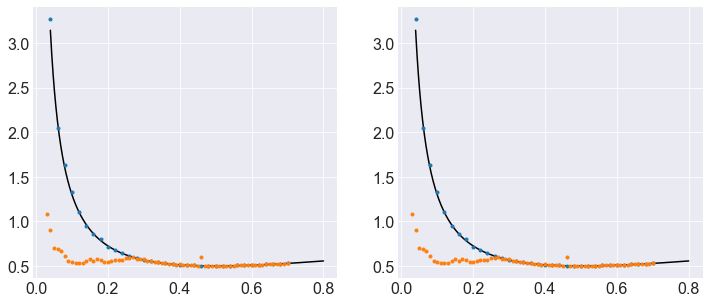

In [709]:
N = ["_", "_importance_", "_importance20_"]
names = ["brute force", "importance", "importance MC=20" ]

alpha = linspace(0.04,0.8, 1000)
energy = 0.5*alpha + 1/(8.0*alpha)

# plot(alpha, energy*2, "-", label="exact energy 2D")
# plot(alpha, energy*3, "-", label="exact energy 3D")

figure(1, figsize=(12,5))

subplot(1,2,1)
plot(alpha, energy, "k-", label="exact energy 1D")

subplot(1,2,2)
plot(alpha, energy, "k-", label="exact energy 1D")

for i in range(len(N)):

    Ni = genfromtxt(file_loc+ "\exercise_e" + "\\analytical_3d_3p%senergy_alpha.txt"%N[i], skip_header=1)

    alpha_Ni = Ni[:,0]
    energy_Ni = Ni[:,1]
    
    subplot(1,2,1)
    plot(alpha_Ni, energy_Ni/(3*3), ".", label = names[i])
    
    
    subplot(1,2,2)
    plot(alpha_Ni, energy_Ni/(3*3), ".", label = names[i])
    
    
    print alpha_Ni[argmax(energy_Ni[:len(energy_Ni)/2])]
    

subplot(1,2,1)
# suptitle("Interaction exact values (3D) 2$^{19}$ number of MC cylces")
xlabel("$\\alpha$")
ylabel("$\left<E_L\\right>$ per particle per dimension $[\hbar \omega]$")
xlim([0.05,0.75])
ylim([0.4,2.0])
legend(loc=1)

subplot(1,2,2)
title("Mimimum energy")
xlabel("$\\alpha$")
ylabel("$\left<E_L\\right>$ per particle per dimension $[\hbar \omega]$")
xlim([0.35,0.65])
ylim([0.495,0.535])
legend()
# tight_layout()
savefig("../Results/comparing_with_exact_1D_interacting.png")



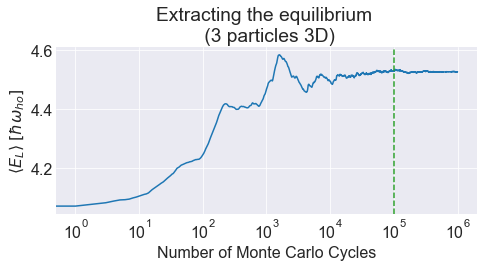

In [208]:
Ni = genfromtxt(file_loc+ "\expectation_energy.txt")


figure(figsize=(7,4))
semilogx(Ni)

title("Extracting the equilibrium \n (3 particles 3D)")
ylabel("$\left< E_L \\right>$ $[\hbar \omega_{ho}]$")
xlabel("Number of Monte Carlo Cycles")
axvline(x=1e5, linestyle="--", color="C2")
tight_layout()
savefig("../Results/equilibrium.png")

410840
4.32347


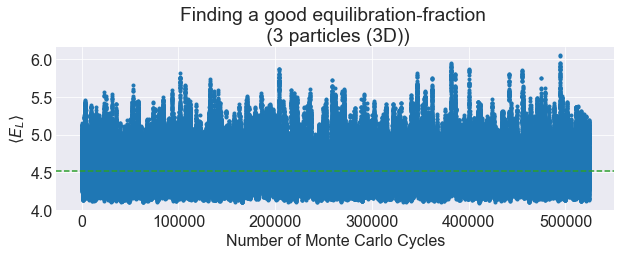

In [330]:
Ni = genfromtxt(file_loc+ "\\test_interacting_energy.txt")



figure(figsize=(10,3))
plot(Ni, ".")

print argmin(Ni)

print Ni[4532]

title("Finding a good equilibration-fraction \n (3 particles (3D))")
ylabel("$\left< E_L \\right>$")
xlabel("Number of Monte Carlo Cycles")
axhline(y=(0.5*0.45+1/(8*0.45))*3*3, linestyle="--", color="C2")
# axvline(x=1e5, linestyle="--", color="C2")

In [74]:

N = [1, 2, 4, 6, 8, 10]

ana_cpu = zeros(len(N))
num_cpu = zeros(len(N))

print "& CPU time: &\\"+"\\"
print "N & Analytical: & Numerical: & Ratio:\\"+ "\\"

# fig, ax = subplots(figsize=(10,7))
for i in range(len(N)):

    Ni     = genfromtxt(file_loc+ "\exercise_b" + "\\analytical_%ip_3d_cpu_time.txt"%N[i], skip_header=1)
    Ni_num = genfromtxt(file_loc+ "\exercise_b" + "\\numerical_%ip_3d_cpu_time.txt"%N[i], skip_header=1)

    ana_cpu[i] = sum(Ni)/float(len(Ni))
    num_cpu[i] = sum(Ni_num)/float(len(Ni_num))
    
    print "%i & %.4f & %.4f & %.4f"%(N[i], ana_cpu[i], num_cpu[i], num_cpu[i]/ana_cpu[i])+ "\\"+"\\"
    
# ax0 = ax.twinx()
# ax.set_title("Comparing CPU time")
# ax.set_xlabel("Number of particles (3D)")
# ax.set_ylabel("Average CPU time (10 runs) [s]")
# a, = ax.plot(N, ana_cpu, "o", color="C3",label = "analytical")
# b, = ax.plot(N, num_cpu, "o", color="C4",label = "numerical")
# ax0.set_ylabel("CPU time$_{num}$/CPU time$_{ana}$")
# c, = ax0.plot(N, num_cpu/ana_cpu, "o", label = "ratio")
# p = [a, b, c]
# ax.legend(p,[p_.get_label() for p_ in p])



& CPU time: &\\
N & Analytical: & Numerical: & Ratio:\\
1 & 1.6319 & 2.7882 & 1.7085\\
2 & 2.3090 & 8.2743 & 3.5835\\
4 & 3.5503 & 14.5833 & 4.1076\\
6 & 4.7517 & 29.1024 & 6.1246\\
8 & 6.0642 & 48.4739 & 7.9934\\
10 & 7.6771 & 67.4531 & 8.7863\\


### exercise c - importance sampling

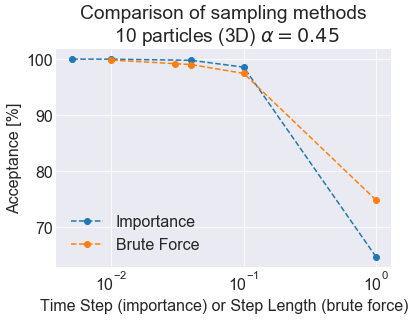

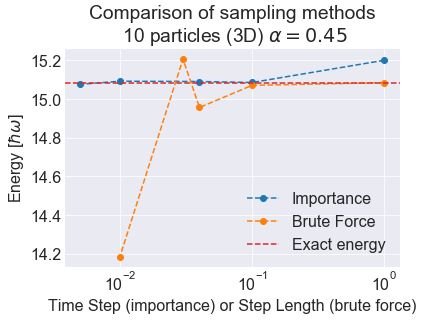

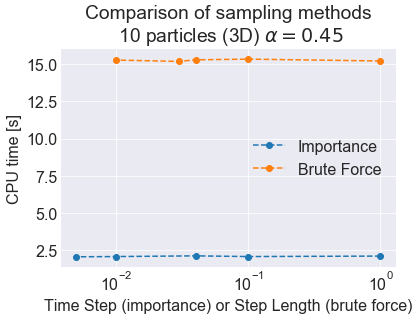

In [210]:
Ni = genfromtxt(file_loc+ "\exercise_c" + "\\analytical_10p_3d_importance.txt", skip_header=1)
Ni_bf = genfromtxt(file_loc+ "\exercise_c" + "\\analytical_10p_3d_brute_force.txt", skip_header=1)

Ni_dls = Ni[:,0]
Ni_acc = Ni[:,1]
Ni_ene = Ni[:,2]
Ni_cput = Ni[:,3]

Ni_bf_dls = Ni_bf[:,0]
Ni_bf_acc = Ni_bf[:,1]
Ni_bf_ene = Ni_bf[:,2]
Ni_bf_cput = Ni_bf[:,3]


figure()
title("Comparison of sampling methods\n 10 particles (3D) $\\alpha = 0.45$")
semilogx(Ni_dls, Ni_acc, "o--", label= "Importance")
semilogx(Ni_bf_dls, Ni_bf_acc, "o--", label= "Brute Force")
ylabel("Acceptance [%]")
xlabel("Time Step (importance) or Step Length (brute force)")
legend()

figure()
title("Comparison of sampling methods\n 10 particles (3D) $\\alpha = 0.45$")
semilogx(Ni_dls, Ni_ene, "o--", label= "Importance")
semilogx(Ni_bf_dls, Ni_bf_ene, "o--", label= "Brute Force")
ylabel("Energy [$\hbar \omega$]")
xlabel("Time Step (importance) or Step Length (brute force)")
alpha = 0.45
axhline(y = (0.5*alpha + 1/(8.0*alpha))*3.0*10.0, linestyle="--", color="C3", label="Exact energy")
legend()

figure()
title("Comparison of sampling methods\n 10 particles (3D) $\\alpha = 0.45$")
semilogx(Ni_dls, Ni_cput, "o--", label= "Importance")
semilogx(Ni_bf_dls, Ni_bf_cput, "o--", label= "Brute Force")
ylabel("CPU time [s]")
xlabel("Time Step (importance) or Step Length (brute force)")
legend()


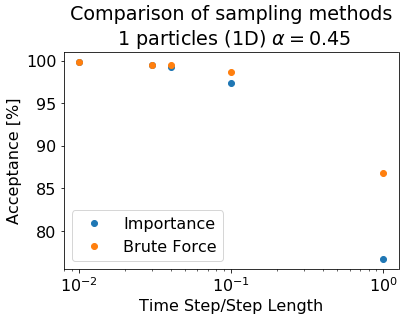

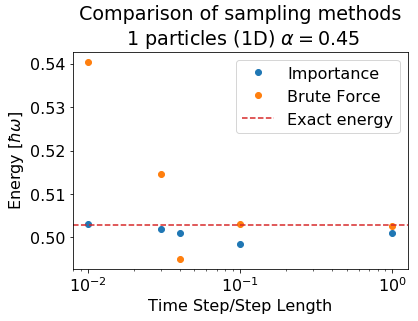

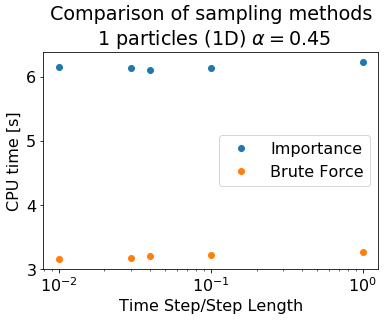

In [49]:
Ni = genfromtxt(file_loc+ "\exercise_c" + "\\analytical_1p_1d_importance.txt", skip_header=1)
Ni_bf = genfromtxt(file_loc+ "\exercise_c" + "\\analytical_1p_1d_brute_force.txt", skip_header=1)

Ni_dls = Ni[:,0]
Ni_acc = Ni[:,1]
Ni_ene = Ni[:,2]
Ni_cput = Ni[:,3]

Ni_bf_dls = Ni_bf[:,0]
Ni_bf_acc = Ni_bf[:,1]
Ni_bf_ene = Ni_bf[:,2]
Ni_bf_cput = Ni_bf[:,3]


figure()
title("Comparison of sampling methods\n 1 particles (1D) $\\alpha = 0.45$ # of MC = $2^{20}$")
semilogx(Ni_dls, Ni_acc, "o", label= "Importance")
semilogx(Ni_bf_dls, Ni_bf_acc, "o", label= "Brute Force")
ylabel("Acceptance [%]")
xlabel("Time Step (importance) or Step Length (brute force)")
legend()

figure()
title("Comparison of sampling methods\n 1 particles (1D) $\\alpha = 0.45$ # of MC = $2^{20}$")
semilogx(Ni_dls, Ni_ene, "o", label= "Importance")
semilogx(Ni_bf_dls, Ni_bf_ene, "o", label= "Brute Force")
ylabel("Energy [$\hbar \omega$]")
xlabel("Time Step (importance) or Step Length (brute force)")
alpha = 0.45
axhline(y = (0.5*alpha + 1/(8.0*alpha)), linestyle="--", color="C3", label="Exact energy")
legend()

figure()
title("Comparison of sampling methods\n 1 particles (1D) $\\alpha = 0.45$ # of MC = $2^{20}$")
semilogx(Ni_dls, Ni_cput, "o", label= "Importance")
semilogx(Ni_bf_dls, Ni_bf_cput, "o", label= "Brute Force")
ylabel("CPU time [s]") # of MC = $2^{20}$
xlabel("Time Step (importance) or Step Length (brute force)")
legend()


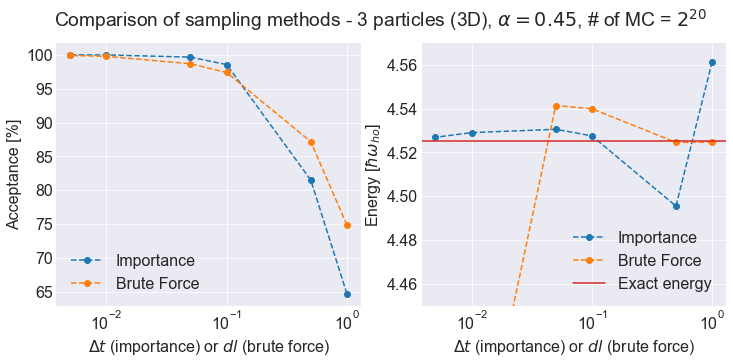

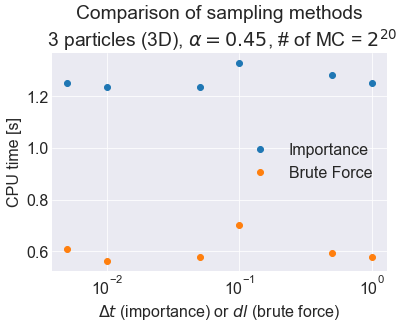

In [231]:
Ni = genfromtxt(file_loc+ "\exercise_c" + "\\analytical_3p_3d_importance.txt", skip_header=1)
Ni_bf = genfromtxt(file_loc+ "\exercise_c" + "\\analytical_3p_3d_brute_force.txt", skip_header=1)

Ni_dls = Ni[:,0]
Ni_acc = Ni[:,1]
Ni_ene = Ni[:,2]
Ni_cput = Ni[:,3]

Ni_bf_dls = Ni_bf[:,0]
Ni_bf_acc = Ni_bf[:,1]
Ni_bf_ene = Ni_bf[:,2]
Ni_bf_cput = Ni_bf[:,3]


figure(figsize=(12,5))

suptitle("Comparison of sampling methods - 3 particles (3D), $\\alpha = 0.45$, # of MC = $2^{20}$")
subplot(1,2,1)
semilogx(Ni_dls, Ni_acc, "o--", label= "Importance")
semilogx(Ni_bf_dls, Ni_bf_acc, "o--", label= "Brute Force")
ylabel("Acceptance [%]")
xlabel("$\Delta t$ (importance) or $dl$ (brute force)")
legend()

subplot(1,2,2)

semilogx(Ni_dls, Ni_ene, "o--", label= "Importance")
semilogx(Ni_bf_dls, Ni_bf_ene, "o--", label= "Brute Force")
ylabel("Energy [$\hbar \omega_{ho}$]")
xlabel("$\Delta t$ (importance) or $dl$ (brute force)")
alpha = 0.45
axhline(y = (0.5*alpha + 1/(8.0*alpha))*3*3, linestyle="-", color="C3", label="Exact energy")
ylim([4.45, 4.57])
legend()
gcf().subplots_adjust(bottom=0.15)
savefig("../Results/comparison_steps_importance.png")

figure()
title("Comparison of sampling methods\n 3 particles (3D), $\\alpha = 0.45$, # of MC = $2^{20}$")
semilogx(Ni_dls, Ni_cput, "o", label= "Importance")
semilogx(Ni_bf_dls, Ni_bf_cput, "o", label= "Brute Force")
ylabel("CPU time [s]")
xlabel("$\Delta t$ (importance) or $dl$ (brute force)")
legend()


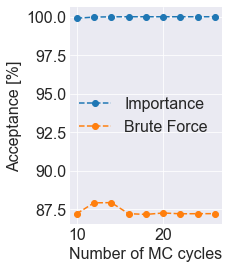

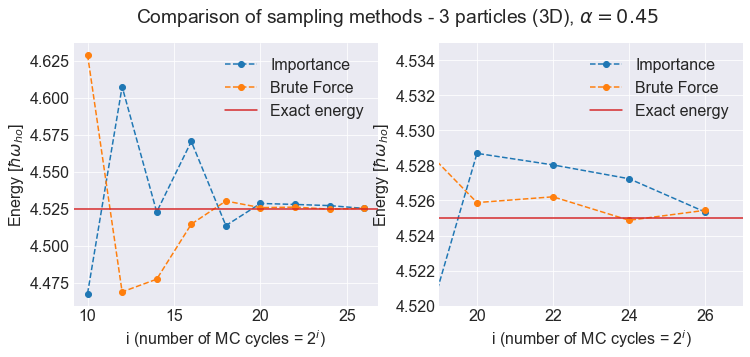

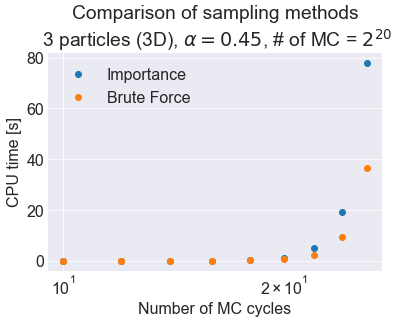

In [263]:
Ni = genfromtxt(file_loc+ "\exercise_c" + "\\analytical_3p_3d_importanceMC_cycles.txt", skip_header=1)
Ni_bf = genfromtxt(file_loc+ "\exercise_c" + "\\analytical_3p_3d_brute_forceMC_cycles.txt", skip_header=1)

Ni_MC = Ni[:,0]
Ni_acc = Ni[:,1]
Ni_ene = Ni[:,2]
Ni_cput = Ni[:,3]

Ni_bf_MC = Ni_bf[:,0]
Ni_bf_acc = Ni_bf[:,1]
Ni_bf_ene = Ni_bf[:,2]
Ni_bf_cput = Ni_bf[:,3]


figure()

title("Comparison of sampling methods - 3 particles (3D), $\\alpha = 0.45$, # of MC = $2^{20}$")
subplot(1,2,1)
plot(Ni_MC, Ni_acc, "o--", label= "Importance")
plot(Ni_bf_MC, Ni_bf_acc, "o--", label= "Brute Force")
ylabel("Acceptance [%]")
xlabel("Number of MC cycles")
legend()

figure(figsize=(12,5))
suptitle("Comparison of sampling methods - 3 particles (3D), $\\alpha = 0.45$")
subplot(1,2,1)
plot(Ni_MC, Ni_ene, "o--", label= "Importance")
plot(Ni_bf_MC, Ni_bf_ene, "o--", label= "Brute Force")
ylabel("Energy [$\hbar \omega_{ho}$]")
xlabel("i (number of MC cycles = 2$^i$)")
alpha = 0.45
axhline(y = (0.5*alpha + 1/(8.0*alpha))*3*3, linestyle="-", color="C3", label="Exact energy")
# ylim([(0.5*alpha + 1/(8.0*alpha))*3*3-0.01, (0.5*alpha + 1/(8.0*alpha))*3*3+0.01])
legend()

subplot(1,2,2)
# gcf().subplots_adjust(top=0.05)
plot(Ni_MC, Ni_ene, "o--", label= "Importance")
plot(Ni_bf_MC, Ni_bf_ene, "o--", label= "Brute Force")
ylabel("Energy [$\hbar \omega_{ho}$]")
xlabel("i (number of MC cycles = 2$^i$)")
alpha = 0.45
axhline(y = (0.5*alpha + 1/(8.0*alpha))*3*3, linestyle="-", color="C3", label="Exact energy")
ylim([(0.5*alpha + 1/(8.0*alpha))*3*3-0.005, (0.5*alpha + 1/(8.0*alpha))*3*3+0.01])
xlim([19,27])
legend()

gcf().subplots_adjust(bottom=0.15)
savefig("../Results/comparison_MC_importance.png")


figure()
title("Comparison of sampling methods\n 3 particles (3D), $\\alpha = 0.45$, # of MC = $2^{20}$")
semilogx(Ni_MC, Ni_cput, "o", label= "Importance")
semilogx(Ni_bf_MC, Ni_bf_cput, "o", label= "Brute Force")
ylabel("CPU time [s]")
xlabel("Number of MC cycles")
legend()

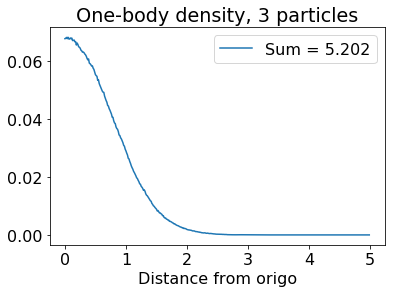

In [111]:
Ni = genfromtxt(file_loc + "\\test_new_importance_density.txt")

r = Ni[:,0]

figure()

density = sqrt(Ni[:,1]**2 + Ni[:, 2]**2 + Ni[:,3]**2)

density = density[:len(density)/2][::-1] + density[len(density)/2:]

plot(r[len(r)/2:], density, '-', label="Sum = %.3f"%sum(density))
title("One-body density, 3 particles")
xlabel("Distance from origo") 
legend()


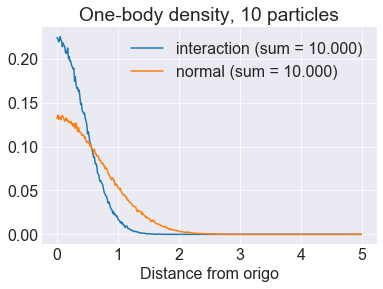

In [143]:
Ni = genfromtxt(file_loc + "\\test_interaction_density.txt")
Ni_normal = genfromtxt(file_loc + "\\test_density.txt")

r = Ni[:,0]

figure()

density = sqrt(Ni[:,3]**2)# + Ni[:, 2]**2 + Ni[:,3]**2)
density_normal = sqrt(Ni_normal[:,3]**2)# + Ni_normal[:, 2]**2 + Ni_normal[:,3]**2)

density = density[:len(density)/2][::-1] + density[len(density)/2:]
density_normal = density_normal[:len(density_normal)/2][::-1] + density_normal[len(density_normal)/2:]

plot(r[len(r)/2:], density, '-', label="interaction (sum = %.3f)"%sum(density))
plot(r[len(r)/2:], density_normal, '-', label="normal (sum = %.3f)"%sum(density_normal))

title("One-body density, 10 particles")
xlabel("Distance from origo") 
legend()


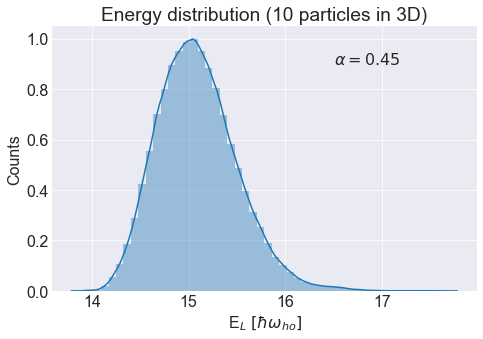

In [264]:
Ni = genfromtxt(file_loc+ "\exercise_b\\allEnergies\\analytical_3d_10p_alpha_45_MC_20_energy.txt")


import seaborn as sns

figure(figsize=(7,5))

sns.set_style('darkgrid')
sns.distplot(Ni)

title("Energy distribution (10 particles in 3D)")
ylabel("Counts")
xlabel(" E$_L$ $[\hbar \omega_{ho}]$ ")
text(16.5, 0.9,"$\\alpha = 0.45$")
tight_layout()
savefig("../Results/histogram_10p_3d_alpha_45.png")

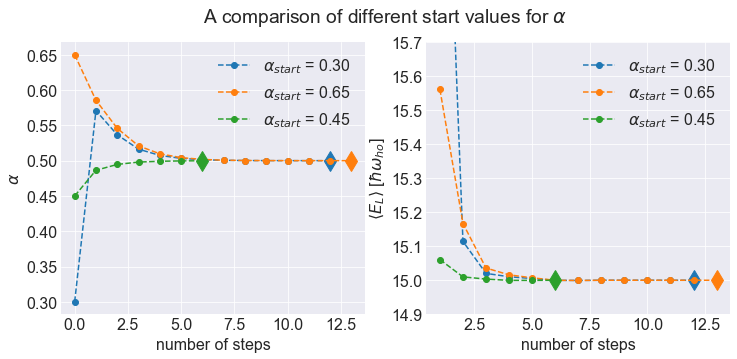

In [379]:
alpha = [ "30", "65", "45"]

figure(1,figsize=(12,5))

for a in range(len(alpha)):
    G1 = genfromtxt(file_loc + "\\exercise_f/10p_3d_alpha_%s_gradient_descent_normal.txt"%alpha[a], skip_header=1)
    # G2 = genfromtxt(file_loc + "\\new_gradient_descent.txt")

    energy_G1 = G1[:,1][:]
    alpha_G1 = G1[:,0][:]

    # energy_G2 = G2[:,1][:]
    # alpha_G2 = G2[:,0][:]

    subplot(1,2,1)
    suptitle("A comparison of different start values for $\\alpha$")
    plot(alpha_G1, 'o--', label="$\\alpha_{start}$ = 0.%s"%alpha[a])
    # plot(alpha_G2, '-', label="extended")
    # xlim([0,25])
    xlabel("number of steps")
    ylabel("$\\alpha$")
    legend()
    plot(len(alpha_G1)-1, alpha_G1[-1], "d", color="C%s"%a, markersize=14)

    subplot(1,2,2)
    steps = linspace(1,len(energy_G1[1:]),len(energy_G1[1:]))

    ylim([14.9,15.7])
    plot(steps, energy_G1[1:], 'o--', label="$\\alpha_{start}$ = 0.%s"%alpha[a])
    plot(len(energy_G1)-1, energy_G1[-1], "d", color="C%s"%a, markersize=14)
    # plot(energy_G2, '-', label="extended")
    xlabel("number of steps")
    ylabel("$\left< E_L \\right> $ [$\hbar\omega_{ho}$]")
    legend()

figure(1)
savefig("../Results/gradient_descent_starts.png")
#     figure(2)

#     title("$\Delta$ energy")
#     delta_energy_G1 = abs(energy_G1[:-1]-energy_G1[1:])
#     # delta_energy_G2 = abs(energy_G2[:-1]-energy_G2[1:])
#     semilogy(delta_energy_G1, '.', label="normal")
#     # semilogy(delta_energy_G2, '.', label="extended")
#     # ylim([1e-8,1e-3])




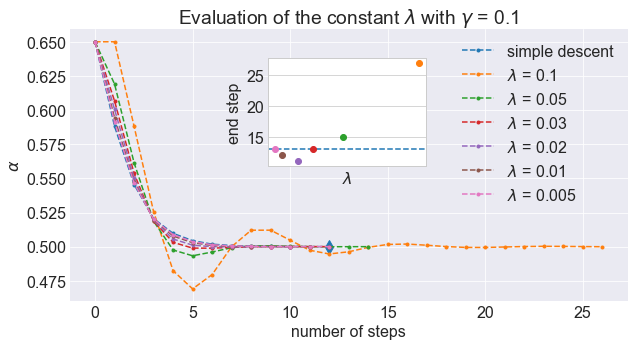

In [690]:
mini =  ["1"]

lambdas = ["1" ,"05", "03","02","01", "005"]

fig, ax = subplots(figsize=(10,5))

left, bottom, width, height = [0.4, 0.5, 0.22, 0.3]
lambdass = [0.1, 0.05, 0.03, 0.02, 0.01, 0.005]
numb_step = [27, 15, 13, 11, 12, 13]

G1 = genfromtxt(file_loc + "\\exercise_f/m_%s_10p_3d_alpha_65_gradient_descent_normal.txt"%mini[0], skip_header=1)

energy_G1 = G1[:,1][:]
alpha_G1 = G1[:,0][:]

ax.plot(alpha_G1, '.--', label="simple descent")
ax.plot(len(alpha_G1)-1, alpha_G1[-1], "d", color="C0", markersize=10)
ax.set_title("Evaluation of the constant $\lambda$ with $\gamma$ = 0.%s"%mini[0])
ax.set_xlabel("number of steps")
ax.set_ylabel("$\\alpha$")


with sns.axes_style("whitegrid"):
    ax2 = fig.add_axes([left, bottom, width, height])
    ax2.set_xlabel("$\lambda$")
    ax2.set_ylabel("end step")
    ax2.set_xticks([])
    
ax2.axhline(y = 13, linestyle="--")

for i in range(len(lambdas)):
    G2 = genfromtxt(file_loc + "\\exercise_f/m_%s_w_%s_3d_10p_alpha_65_gradient_descent_extended.txt"%(mini[0],lambdas[i]), skip_header=1)

    energy_G2 = G2[:,1][:]
    alpha_G2 = G2[:,0][:]

    ax.plot(alpha_G2, '.--', label="$\lambda$ = 0.%s"%lambdas[i])
    ax2.plot(lambdass[i], numb_step[i] ,"o", color="C%s"%(i+1))

    

#     print float("0.%s"%lambdas[i])
#     print len(alpha_G2)
    
ax.legend()

savefig("../Results/comparing_gradient_descents.png")
#     title("$\Delta$ energy")
#     delta_energy_G1 = abs(energy_G1[:-1]-energy_G1[1:])
#     # delta_energy_G2 = abs(energy_G2[:-1]-energy_G2[1:])
#     semilogy(delta_energy_G1, '.', label="normal")
#     # semilogy(delta_energy_G2, '.', label="extended")
#     # ylim([1e-8,1e-3])

#     legend()


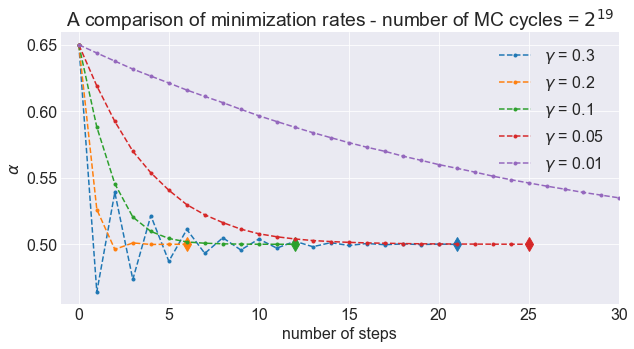

In [689]:
mini =  ["3","2","1","05", "01"]
figure(1,figsize=(10,5))

for a in range(len(mini)):
    G2 = genfromtxt(file_loc + "\\exercise_f/m_%s_10p_3d_alpha_65_gradient_descent_normal.txt"%mini[a], skip_header=1)

    energy_G2 = G2[:,1][:]
    alpha_G2 = G2[:,0][:]
    
    figure(1)
#     subplot(1,2,1)
    plot(alpha_G2, '.--', label="$\gamma$ = 0.%s"%mini[a])
    plot(len(alpha_G2)-1, alpha_G2[-1], "d", color="C%s"%a, markersize=10)

figure(1)
title("A comparison of minimization rates - number of MC cycles = $2^{19}$")
xlabel("number of steps")
ylabel("$\\alpha$")
xlim([-1,30])
legend()
savefig("../Results/gradient_minimization_rate.png")
#     subplot(1,2,2)

#     plot(energy_G2[1:], '.--', label="$\lambda$ = 0.%s"%mini[a])
#     xlabel("steps")
#     ylabel("$\left< E_L \\right> $ [$\hbar\omega_{ho}$]")
#     xlim([-1,26])
#     legend()


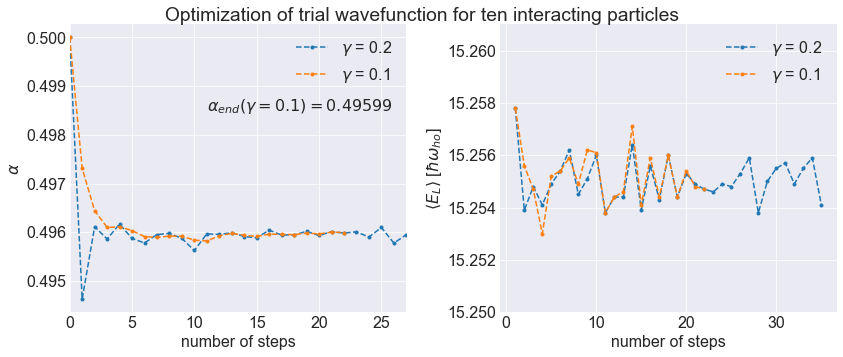

In [530]:
mini = [ "2", "1"]

figure(1,figsize=(12,5))

for a in range(len(mini)):
    G1 = genfromtxt(file_loc + "\\exercise_f/m_%s_10p_3d_interaction.txt"%mini[a], skip_header=1)
    # G2 = genfromtxt(file_loc + "\\new_gradient_descent.txt")

    energy_G1 = G1[:,1][:]
    alpha_G1 = G1[:,0][:]

    # energy_G2 = G2[:,1][:]
    # alpha_G2 = G2[:,0][:]

    subplot(1,2,1)
    suptitle("Optimization of trial wavefunction for ten interacting particles", y=1.0)
    plot(alpha_G1, '.--', label="$\gamma$ = 0.%s"%mini[a])
    # plot(alpha_G2, '-', label="extended")
    xlim([0,27])
    xlabel("number of steps")
    ylabel("$\\alpha$")
    legend()
    if a == 1:
        text(11, 0.4985, "$\\alpha_{end}(\gamma = 0.%s) = %.5f$"%(mini[a], alpha_G1[-1]))
#     plot(len(alpha_G1)-1, alpha_G1[-1], "d", color="C%s"%a, markersize=14)

    subplot(1,2,2)
    steps = linspace(1,len(energy_G1[1:]),len(energy_G1[1:]))

    ylim([15.250, 15.261])
    plot(steps, energy_G1[1:], '.--', label="$\gamma$ = 0.%s"%mini[a])
#     plot(len(energy_G1)-1, energy_G1[-1], "d", color="C%s"%a, markersize=14)
    # plot(energy_G2, '-', label="extended")
    xlabel("number of steps")
    ylabel("$\left< E_L \\right> $ [$\hbar\omega_{ho}$]")
    legend()
    
    
figure(1)
tight_layout()
savefig("../Results/gradient_descent_interaction.png")
#     figure(2)

#     title("$\Delta$ energy")
#     delta_energy_G1 = abs(energy_G1[:-1]-energy_G1[1:])
#     # delta_energy_G2 = abs(energy_G2[:-1]-energy_G2[1:])
#     semilogy(delta_energy_G1, '.', label="normal")
#     # semilogy(delta_energy_G2, '.', label="extended")
#     # ylim([1e-8,1e-3])




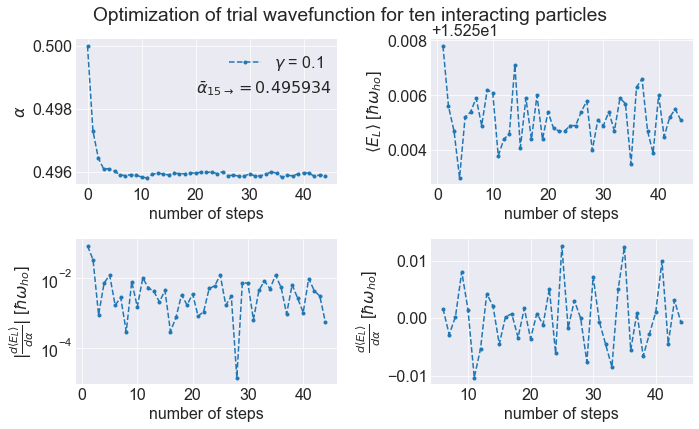

In [657]:
mini = [ "1"]

figure(1,figsize=(10,6))

for a in range(len(mini)):
    G1 = genfromtxt(file_loc + "\\exercise_f/m_%s_10p_3d_interaction.txt"%mini[a], skip_header=1)
    # G2 = genfromtxt(file_loc + "\\new_gradient_descent.txt")

    energy_G1 = G1[:,1][:45]
    alpha_G1 = G1[:,0][:45]
    derivative = G1[:,2][:45]

    # energy_G2 = G2[:,1][:]
    # alpha_G2 = G2[:,0][:]

    subplot(2,2,1)
    suptitle("Optimization of trial wavefunction for ten interacting particles", y=1.0)
    plot(alpha_G1, '.--', label="$\gamma$ = 0.%s"%mini[a])
    # plot(alpha_G2, '-', label="extended")
#     xlim([0,27])
    xlabel("number of steps")
    ylabel("$\\alpha$")
    legend()
    if a == 0:
        text(20, 0.4985, "$\\bar{\\alpha}_{15\\rightarrow} = %.6f$"%( sum(alpha_G1[15:])/float(len(alpha_G1[15:]))))
#     plot(len(alpha_G1)-1, alpha_G1[-1], "d", color="C%s"%a, markersize=14)

    subplot(2,2,2)
    steps = linspace(1,len(energy_G1[1:]),len(energy_G1[1:]))

#     ylim([14.996, 15.001])
    plot(steps, energy_G1[1:], '.--')#, label="$\gamma$ = 0.%s"%mini[a])
#     plot(len(energy_G1)-1, energy_G1[-1], "d", color="C%s"%a, markersize=14)
    # plot(energy_G2, '-', label="extended")
    xlabel("number of steps")
    ylabel("$\left< E_L \\right> $ [$\hbar\omega_{ho}$]")
    legend()
    
    subplot(2,2,3)
    steps = linspace(1,len(energy_G1[1:]),len(energy_G1[1:]))
    semilogy(steps[:], abs(derivative[1:]), '.--')#, label="$\gamma$ = 0.%s"%mini[a])
    xlabel("number of steps")
    ylabel("$|\\frac{d\left< E_L \\right>}{d \\alpha}| $ [$\hbar\omega_{ho}$]")
    legend()
    
    subplot(2,2,4)
    steps = linspace(1,len(energy_G1[1:]),len(energy_G1[1:]))
    plot(steps[5:], derivative[5+1:], '.--')#, label="$\gamma$ = 0.%s"%mini[a])
    xlabel("number of steps")
    ylabel("$\\frac{d\left< E_L \\right>}{d \\alpha} $ [$\hbar\omega_{ho}$]")
    legend()
    
    
    
figure(1)
tight_layout()
savefig("../Results/gradient_descent_interaction_10p.png")
#     figure(2)

#     title("$\Delta$ energy")
#     delta_energy_G1 = abs(energy_G1[:-1]-energy_G1[1:])
#     # delta_energy_G2 = abs(energy_G2[:-1]-energy_G2[1:])
#     semilogy(delta_energy_G1, '.', label="normal")
#     # semilogy(delta_energy_G2, '.', label="extended")
#     # ylim([1e-8,1e-3])




### Interacting and spherical

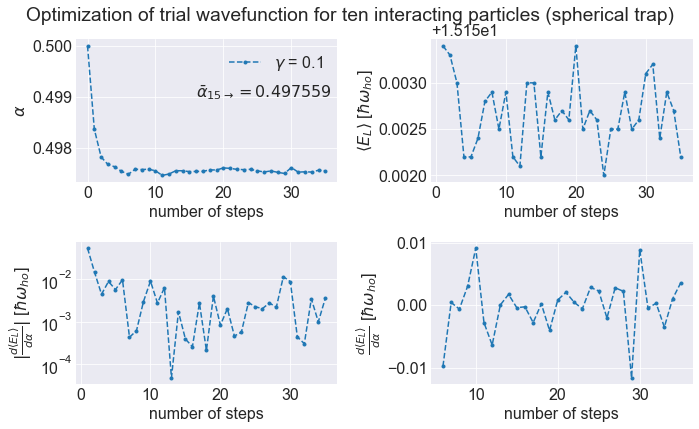

In [668]:
mini = [ "1"]

figure(1,figsize=(10,6))

for a in range(len(mini)):
    G1 = genfromtxt(file_loc + "\\exercise_f/m_%s_10p_3d_interaction_spherical.txt"%mini[a], skip_header=1)
    # G2 = genfromtxt(file_loc + "\\new_gradient_descent.txt")

    energy_G1 = G1[:,1][:45]
    alpha_G1 = G1[:,0][:45]
    derivative = G1[:,2][:45]

    # energy_G2 = G2[:,1][:]
    # alpha_G2 = G2[:,0][:]

    subplot(2,2,1)
    suptitle("Optimization of trial wavefunction for ten interacting particles (spherical trap)", y=1.0)
    plot(alpha_G1, '.--', label="$\gamma$ = 0.%s"%mini[a])
    # plot(alpha_G2, '-', label="extended")
#     xlim([0,27])
    xlabel("number of steps")
    ylabel("$\\alpha$")
    legend()
    if a == 0:
        text(16, 0.499, "$\\bar{\\alpha}_{15\\rightarrow} = %.6f$"%( sum(alpha_G1[15:])/float(len(alpha_G1[15:]))))
#     plot(len(alpha_G1)-1, alpha_G1[-1], "d", color="C%s"%a, markersize=14)

    subplot(2,2,2)
    steps = linspace(1,len(energy_G1[1:]),len(energy_G1[1:]))

#     ylim([14.996, 15.001])
    plot(steps, energy_G1[1:], '.--')#, label="$\gamma$ = 0.%s"%mini[a])
#     plot(len(energy_G1)-1, energy_G1[-1], "d", color="C%s"%a, markersize=14)
    # plot(energy_G2, '-', label="extended")
    xlabel("number of steps")
    ylabel("$\left< E_L \\right> $ [$\hbar\omega_{ho}$]")
    legend()
    
    subplot(2,2,3)
    steps = linspace(1,len(energy_G1[1:]),len(energy_G1[1:]))
    semilogy(steps[:], abs(derivative[1:]), '.--')#, label="$\gamma$ = 0.%s"%mini[a])
    xlabel("number of steps")
    ylabel("$|\\frac{d\left< E_L \\right>}{d \\alpha}| $ [$\hbar\omega_{ho}$]")
    legend()
    
    subplot(2,2,4)
    steps = linspace(1,len(energy_G1[1:]),len(energy_G1[1:]))
    plot(steps[5:], derivative[5+1:], '.--')#, label="$\gamma$ = 0.%s"%mini[a])
    xlabel("number of steps")
    ylabel("$\\frac{d\left< E_L \\right>}{d \\alpha} $ [$\hbar\omega_{ho}$]")
    legend()
    
    
    
figure(1)
tight_layout()
savefig("../Results/gradient_descent_interaction_10p_spherical.png")
#     figure(2)

#     title("$\Delta$ energy")
#     delta_energy_G1 = abs(energy_G1[:-1]-energy_G1[1:])
#     # delta_energy_G2 = abs(energy_G2[:-1]-energy_G2[1:])
#     semilogy(delta_energy_G1, '.', label="normal")
#     # semilogy(delta_energy_G2, '.', label="extended")
#     # ylim([1e-8,1e-3])




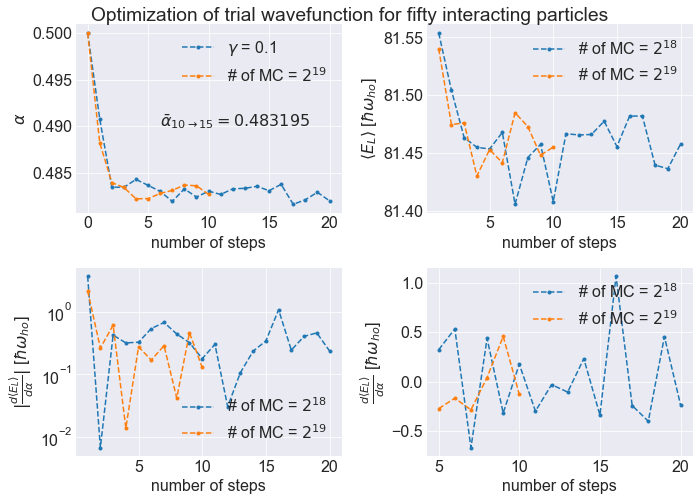

In [699]:
mini = [ "1"]

figure(1,figsize=(10,7))

for a in range(len(mini)):
    G1 = genfromtxt(file_loc + "\\exercise_f/m_%s_50p_3d_interaction_MC18.txt"%mini[a], skip_header=1)
    G2 = genfromtxt(file_loc + "\\exercise_f/m_%s_50p_3d_interaction.txt"%mini[a], skip_header=1)

    energy_G1 = G1[:,1][:]
    alpha_G1 = G1[:,0][:]
    derivative = G1[:,2][:]

    energy_G2 = G2[:,1][:]
    alpha_G2 = G2[:,0][:]
    derivative_G2 = G2[:,2][:]

    subplot(2,2,1)
    suptitle("Optimization of trial wavefunction for fifty interacting particles", y=1.0)
    plot(alpha_G1, '.--', label="$\gamma$ = 0.%s"%mini[a])
    plot(alpha_G2, '.--', label="# of MC = $2^{19}$")
#     xlim([0,27])
    xlabel("number of steps")
    ylabel("$\\alpha$")
    legend()

    text(6, 0.49, "$\\bar{\\alpha}_{10\\rightarrow 15} = %.6f$"%( sum(alpha_G1[10:15])/float(len(alpha_G1[10:15]))))

    subplot(2,2,2)
    steps = linspace(1,len(energy_G1[1:]),len(energy_G1[1:]))
    steps_G2 = linspace(1,len(energy_G2[1:]),len(energy_G2[1:]))

#     ylim([14.996, 15.001])
    plot(steps, energy_G1[1:], '.--', label="# of MC = $2^{18}$")
#     plot(len(energy_G1)-1, energy_G1[-1], "d", color="C%s"%a, markersize=14)
    plot(steps_G2, energy_G2[1:], '.--', label="# of MC = $2^{19}$")
    xlabel("number of steps")
    ylabel("$\left< E_L \\right> $ [$\hbar\omega_{ho}$]")
    legend()
    
    subplot(2,2,3)
    steps = linspace(1,len(energy_G1[1:]),len(energy_G1[1:]))
    semilogy(steps[:], abs(derivative[1:]), '.--', label="# of MC = $2^{18}$")
    semilogy(steps_G2, abs(derivative_G2[1:]), '.--', label="# of MC = $2^{19}$")
    xlabel("number of steps")
    ylabel("$|\\frac{d\left< E_L \\right>}{d \\alpha}| $ [$\hbar\omega_{ho}$]")
    legend()
    
    subplot(2,2,4)
    steps = linspace(1,len(energy_G1[1:]),len(energy_G1[1:]))
    plot(steps[4:], derivative[4+1:], '.--', label="# of MC = $2^{18}$")
    plot(steps_G2[4:], derivative_G2[4+1:], '.--', label="# of MC = $2^{19}$")
    xlabel("number of steps")
    ylabel("$\\frac{d\left< E_L \\right>}{d \\alpha} $ [$\hbar\omega_{ho}$]")
    legend()
    
    
    
figure(1)
tight_layout()
savefig("../Results/gradient_descent_interaction_50p.png")
#     figure(2)

#     title("$\Delta$ energy")
#     delta_energy_G1 = abs(energy_G1[:-1]-energy_G1[1:])
#     # delta_energy_G2 = abs(energy_G2[:-1]-energy_G2[1:])
#     semilogy(delta_energy_G1, '.', label="normal")
#     # semilogy(delta_energy_G2, '.', label="extended")
#     # ylim([1e-8,1e-3])




### Not interacting

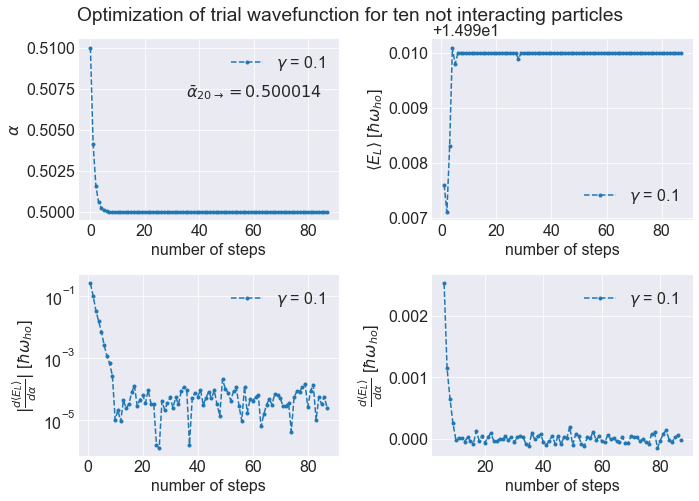

In [619]:
mini = [ "1"]

figure(1,figsize=(10,7))

for a in range(len(mini)):
    G1 = genfromtxt(file_loc + "\\exercise_f/m_%s_10p_3d_alpha_51_gradient_descent_normal.txt"%mini[a], skip_header=1)
    # G2 = genfromtxt(file_loc + "\\new_gradient_descent.txt")

    energy_G1 = G1[:,1][:]
    alpha_G1 = G1[:,0][:]
    derivative = G1[:,2][:]

    # energy_G2 = G2[:,1][:]
    # alpha_G2 = G2[:,0][:]


    subplot(2,2,1)
    suptitle("Optimization of trial wavefunction for ten not interacting particles", y=1.0)
    plot(alpha_G1, '.--', label="$\gamma$ = 0.%s"%mini[a])
    # plot(alpha_G2, '-', label="extended")
#     xlim([0,27])
    xlabel("number of steps")
    ylabel("$\\alpha$")
    legend()
    if a == 0:
        text(35, 0.507, "$\\bar{\\alpha}_{20\\rightarrow} = %.6f$"%( sum(alpha_G1[20:])/float(len(alpha_G1[20:]))))
#     plot(len(alpha_G1)-1, alpha_G1[-1], "d", color="C%s"%a, markersize=14)

    subplot(2,2,2)
    steps = linspace(1,len(energy_G1[1:]),len(energy_G1[1:]))

#     ylim([14.996, 15.001])
    plot(steps, energy_G1[1:], '.--', label="$\gamma$ = 0.%s"%mini[a])
#     plot(len(energy_G1)-1, energy_G1[-1], "d", color="C%s"%a, markersize=14)
    # plot(energy_G2, '-', label="extended")
    xlabel("number of steps")
    ylabel("$\left< E_L \\right> $ [$\hbar\omega_{ho}$]")
    legend()
    
    subplot(2,2,3)
    steps = linspace(1,len(energy_G1[1:]),len(energy_G1[1:]))
    semilogy(steps[:], abs(derivative[1:]), '.--', label="$\gamma$ = 0.%s"%mini[a])
    xlabel("number of steps")
    ylabel("$|\\frac{d\left< E_L \\right>}{d \\alpha}| $ [$\hbar\omega_{ho}$]")
    legend()
    
    subplot(2,2,4)
    steps = linspace(1,len(energy_G1[1:]),len(energy_G1[1:]))
    plot(steps[5:], derivative[5+1:], '.--', label="$\gamma$ = 0.%s"%mini[a])
    xlabel("number of steps")
    ylabel("$\\frac{d\left< E_L \\right>}{d \\alpha} $ [$\hbar\omega_{ho}$]")
    legend()
    
figure(1)
tight_layout()
# savefig("../Results/gradient_descent_interaction.png")
#     figure(2)

#     title("$\Delta$ energy")
#     delta_energy_G1 = abs(energy_G1[:-1]-energy_G1[1:])
#     # delta_energy_G2 = abs(energy_G2[:-1]-energy_G2[1:])
#     semilogy(delta_energy_G1, '.', label="normal")
#     # semilogy(delta_energy_G2, '.', label="extended")
#     # ylim([1e-8,1e-3])




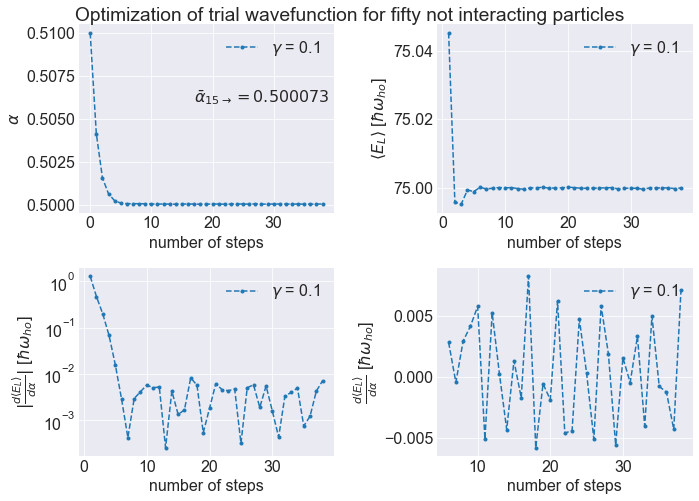

In [613]:
mini = [ "1"]

figure(1,figsize=(10,7))

for a in range(len(mini)):
    G1 = genfromtxt(file_loc + "\\exercise_f/m_%s_50p_3d_alpha_51_gradient_descent_normal.txt"%mini[a], skip_header=1)
    # G2 = genfromtxt(file_loc + "\\new_gradient_descent.txt")

    energy_G1 = G1[:,1][:]
    alpha_G1 = G1[:,0][:]
    derivative = G1[:,2][:]

    # energy_G2 = G2[:,1][:]
    # alpha_G2 = G2[:,0][:]

    subplot(2,2,1)
    suptitle("Optimization of trial wavefunction for fifty not interacting particles", y=1.0)
    plot(alpha_G1, '.--', label="$\gamma$ = 0.%s"%mini[a])
    # plot(alpha_G2, '-', label="extended")
#     xlim([0,27])
    xlabel("number of steps")
    ylabel("$\\alpha$")
    legend()
    if a == 0:
        text(17, 0.506, "$\\bar{\\alpha}_{15\\rightarrow} = %.6f$"%( sum(alpha_G1[15:])/float(len(alpha_G1[15:]))))
#     plot(len(alpha_G1)-1, alpha_G1[-1], "d", color="C%s"%a, markersize=14)

    subplot(2,2,2)
    steps = linspace(1,len(energy_G1[1:]),len(energy_G1[1:]))

#     ylim([14.996, 15.001])
    plot(steps, energy_G1[1:], '.--', label="$\gamma$ = 0.%s"%mini[a])
#     plot(len(energy_G1)-1, energy_G1[-1], "d", color="C%s"%a, markersize=14)
    # plot(energy_G2, '-', label="extended")
    xlabel("number of steps")
    ylabel("$\left< E_L \\right> $ [$\hbar\omega_{ho}$]")
    legend()
    
    subplot(2,2,3)
    steps = linspace(1,len(energy_G1[1:]),len(energy_G1[1:]))
    semilogy(steps[:], abs(derivative[1:]), '.--', label="$\gamma$ = 0.%s"%mini[a])
    xlabel("number of steps")
    ylabel("$|\\frac{d\left< E_L \\right>}{d \\alpha}| $ [$\hbar\omega_{ho}$]")
    legend()
    
    subplot(2,2,4)
    steps = linspace(1,len(energy_G1[1:]),len(energy_G1[1:]))
    plot(steps[5:], derivative[5+1:], '.--', label="$\gamma$ = 0.%s"%mini[a])
    xlabel("number of steps")
    ylabel("$\\frac{d\left< E_L \\right>}{d \\alpha} $ [$\hbar\omega_{ho}$]")
    legend()
    
    
    
figure(1)
tight_layout()

In [ ]:
mini = [ "1"]

figure(1,figsize=(12,3))

for a in range(len(mini)):
    G1 = genfromtxt(file_loc + "\\exercise_f/m_%s_100p_3d_alpha_51_gradient_descent_normal.txt"%mini[a], skip_header=1)
    # G2 = genfromtxt(file_loc + "\\new_gradient_descent.txt")

    energy_G1 = G1[:,1][:]
    alpha_G1 = G1[:,0][:]

    # energy_G2 = G2[:,1][:]
    # alpha_G2 = G2[:,0][:]

    subplot(1,2,1)
    suptitle("Optimization of trial wavefunction for 100 not interacting particles", y=1.0)
    plot(alpha_G1, '.--', label="$\gamma$ = 0.%s"%mini[a])
    # plot(alpha_G2, '-', label="extended")
#     xlim([0,27])
    xlabel("number of steps")
    ylabel("$\\alpha$")
    legend()
if a == 0:
        text(17, 0.506, "$\\bar{\\alpha}_{15\\rightarrow} = %.6f$"%( sum(alpha_G1[15:])/float(len(alpha_G1[15:]))))
#     plot(len(alpha_G1)-1, alpha_G1[-1], "d", color="C%s"%a, markersize=14)

    subplot(1,2,2)
    steps = linspace(1,len(energy_G1[1:]),len(energy_G1[1:]))

#     ylim([14.996, 15.001])
    plot(steps, energy_G1[1:], '.--', label="$\gamma$ = 0.%s"%mini[a])
#     plot(len(energy_G1)-1, energy_G1[-1], "d", color="C%s"%a, markersize=14)
    # plot(energy_G2, '-', label="extended")
    xlabel("number of steps")
    ylabel("$\left< E_L \\right> $ [$\hbar\omega_{ho}$]")
    legend()
    
    
figure(1)
tight_layout()

### One-body densities

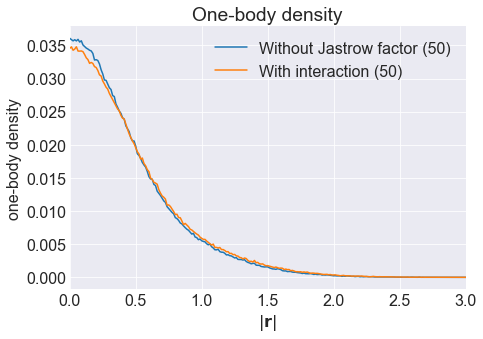

In [712]:
Ni = genfromtxt(file_loc + "\exercise_f\\10p_3d_post_gradient_descent_interacting_density.txt")
Ni_normal = genfromtxt(file_loc + "\exercise_f\\10p_3d_post_gradient_descent_no_jastrow_density.txt")
Ni_spherical = genfromtxt(file_loc +"\exercise_f\\50p_3d_post_gradient_descent_interacting_density.txt")
Ni_50 = genfromtxt(file_loc + "\exercise_f\\50p_3d_post_gradient_descent_no_jastrow_density.txt")

r = Ni_normal[:,0]

figure(figsize=(7,5))

density = sqrt(Ni[:,3]**2 + Ni[:, 2]**2 + Ni[:,3]**2)
density_50 = sqrt(Ni_50[:,3]**2 + Ni_50[:, 2]**2 + Ni_50[:,3]**2)
density_normal = sqrt(Ni_normal[:,3]**2 + Ni_normal[:, 2]**2 + Ni_normal[:,3]**2)
density_spherical = sqrt(Ni_spherical[:,3]**2 + Ni_spherical[:, 2]**2 + Ni_spherical[:,3]**2)

density = density[:len(density)/2][::-1] + density[len(density)/2:]
density_50 = density_50[:len(density_50)/2][::-1] + density_50[len(density_50)/2:]
density_normal = density_normal[:len(density_normal)/2][::-1] + density_normal[len(density_normal)/2:]
density_spherical = density_spherical[:len(density_spherical)/2][::-1] + density_spherical[len(density_spherical)/2:]

plot(r[len(r)/2:], density_50, '-', label="Without Jastrow factor (50)"%sum(density_50))
# plot(r[len(r)/2:], density, '-', label="With interaction (10)"%sum(density))
plot(r[len(r)/2:], density_spherical, '-', label="With interaction (50)"%sum(density_spherical))
# plot(r[len(r)/2:], density_normal, '-', label="Without Jastrow factor (10)"%sum(density_normal))

title("One-body density")
xlabel("$|\\mathbf{r}|$")
ylabel("one-body density")
xlim([0,3.0])
legend()
tight_layout()
savefig("../Results/one_body_density_10p.png")